<a href="https://colab.research.google.com/github/GreggHeller1/dendritic_distance/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#settings
%load_ext autoreload
%autoreload 2
try:
  import google.colab
  in_colab = True
except:
  in_colab = False
print(in_colab)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
False


In [3]:
#installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/dendritic_distance.git
    pip install read_roi


In [4]:
#local imports
#cwd if in colab for imports to work
if in_colab:
    %cd /content/dendritic_distance
    
from src import helper_functions as hf
from src import config as cfg
from src import data_io as io


In [5]:
#imports

from matplotlib import pyplot as plt
import os
import numpy as np

In [7]:
#define paths
#cwd if in colab for file loading to work
if in_colab:
    %cd /content/Neuron_Tutorial/scripts
    
test_path = os.path.join('demo_data', 'test.txt')
print(test_path)
print(os.getcwd())
os.path.exists(test_path)

demo_data/test.txt
/Users/Gregg/code/dendritic_distance


True

In [8]:
#data inputs
io.readfile(test_path)


Reading file at demo_data/test.txt
Testing whether we can read the contents of a text file in colab

maybe we need another line?


# Dendritic Distance

This notebook is intended to demonstrate the functionality of the dendritic distance repository - computing the distance between pairs of spines captured in a single field of view for different types of distance - both dednritic path ffollowing distance, and euclidian "as the crow flies" distance." It is currently intended for planar images, but could be adapted to Z stacks and distance in 3d space in the future. 



# You can also use this colab notebook to test the code on your own images and ROIs by adding a new folder to demo_data that contains the 3 required files with appropriate names

In [12]:
def main(kyle_rois, projection_tif, shaft_roi):
    
    spine_rois, dend_rois, other_rois = io.seperate_kyle_rois(kyle_rois)
    all_segments, branch_points, fiducial_rois = hf.initialize_dendrite(shaft_roi)

    spines = []
    sanity_checks = {}
    for spine_roi, dend_roi in zip(spine_rois, dend_rois):
        this_spine = hf.Spine(spine_roi, dend_roi, all_segments)
        spines.append(this_spine)
        for sanity_check, value in this_spine.sanity_checks.items():
            if not (sanity_check in sanity_checks):
                sanity_checks[sanity_check] = []
            sanity_checks[sanity_check].append(value)

    spine_dmats = hf.euclidian_dmats(spines)
    dend_d_mat, b_mat = hf.dendritic_distance_matrix(spines)
    spine_dmats["dendritic_distance"] = dend_d_mat
    spine_dmats["seperated_by_branch_point"] = b_mat.astype(int)
    
    return spines, all_segments, spine_dmats, sanity_checks
    

[115. 501.]
[139.25       225.08333333]
[314.2 339.6]
[158.09091464  30.98484733]
[122.09091464  20.98484733]
[183.31818737 105.18182026]
[229.31818737 104.18182026]
[206.72222053  80.83333672]
[230.72222053  69.83333672]
[194.59999695 127.33333359]
[226.59999695 133.33333359]
[157.56060652 128.42424913]
[114.56060652 113.42424913]
[102.48333282 165.11667023]
[102.48333282 142.11667023]
[121.99999523 219.64583778]
[ 96.99999523 192.64583778]
[ 77.63636641 215.34848022]
[ 34.63636641 210.34848022]
[174.84848993 231.74243025]
[182.84848993 195.74243025]
[ 88.93333359 269.13333435]
[ 43.93333359 256.13333435]
[146.93938932 270.28787509]
[181.93938932 263.28787509]
[137.88332672 295.60000916]
[196.88332672 298.60000916]
[166.9833374  290.80000916]
[192.9833374  272.80000916]
[ 93.07407125 380.61109755]
[ 74.07407125 359.61109755]
[ 87.95833111 396.29167938]
[ 56.95833111 382.29167938]
[ 72.13333054 435.71666565]
[ 48.13333054 408.71666565]
[142.8888838  449.77778456]
[127.8888838  435.7777

[158.09091464  30.98484733]
[183.31818737 105.18182026]
[206.72222053  80.83333672]
[194.59999695 127.33333359]
[157.56060652 128.42424913]
[102.48333282 165.11667023]
[121.99999523 219.64583778]
[ 77.63636641 215.34848022]
[174.84848993 231.74243025]
[ 88.93333359 269.13333435]
[146.93938932 270.28787509]
[137.88332672 295.60000916]
[166.9833374  290.80000916]
[ 93.07407125 380.61109755]
[ 87.95833111 396.29167938]
[ 72.13333054 435.71666565]
[142.8888838  449.77778456]
[127.39583874 421.64582062]
[156.46296692 389.59259372]
[210.8888838  434.55555556]
[251.72223239 361.50000339]
[292.01515059 318.93940596]
[303.54166794 345.85415268]
[313.9523795  363.71427264]
[340.20834351 314.31248856]
[359.10001221 300.00001221]
[389.92856271 248.95237296]
[423.45832825 256.99999809]
[483.56249237 244.08333969]
[122.09091464  20.98484733]
[229.31818737 104.18182026]
[230.72222053  69.83333672]
[226.59999695 133.33333359]
[114.56060652 113.42424913]
[102.48333282 142.11667023]
[ 96.99999523 192.64

[389.92856271 248.95237296]
[423.45832825 256.99999809]
[483.56249237 244.08333969]
[122.09091464  20.98484733]
[229.31818737 104.18182026]
[230.72222053  69.83333672]
[226.59999695 133.33333359]
[114.56060652 113.42424913]
[102.48333282 142.11667023]
[ 96.99999523 192.64583778]
[ 34.63636641 210.34848022]
[182.84848993 195.74243025]
[ 43.93333359 256.13333435]
[181.93938932 263.28787509]
[196.88332672 298.60000916]
[192.9833374  272.80000916]
[ 74.07407125 359.61109755]
[ 56.95833111 382.29167938]
[ 48.13333054 408.71666565]
[127.8888838  435.77778456]
[127.39583874 390.64582062]
[152.46296692 359.59259372]
[263.88887702 453.55555556]
[255.7222307  321.50000339]
[292.01515059 281.93940596]
[314.54166794 279.85415268]
[320.9523795  389.71427264]
[314.20834351 302.31248856]
[332.10001221 279.00001221]
[386.92856271 224.95237296]
[410.45832825 223.99999809]
[487.56249237 271.08335876]
[171.45000458  46.76666622]
[165.68517897  92.83333588]
[164.90476336  96.30952127]
[148.47916603 169.08

[118.34375 417.15625]
[152.89285714 413.64285714]
[156.40625 376.40625]
[183.58333333 350.04166667]
[212.64285714 323.46428571]
[216.95833333 302.        ]
[202.11111111 259.47222222]
[232.05 227.75]
[285.65625 252.34375]
[379.38888889 212.16666667]
[349.96875 148.71875]
[413. 176.]
[432.28125 198.625  ]
[227.34375 197.46875]
[306.58333333 230.20833333]
[ 47.40625 385.21875]
[ 66.03125 402.75   ]
[127.34375 454.15625]
[155.89285714 441.64285714]
[186.40625 395.40625]
[194.58333333 369.04166667]
[224.64285714 342.46428571]
[236.95833333 310.        ]
[171.11111111 244.47222222]
[216.05 230.75]
[277.65625 296.34375]
[379.38888889 256.16666667]
[302.96875 143.71875]
[403. 136.]
[413.28125 235.625  ]
[197.34375 188.46875]
[316.15 245.85]
[ 44.40625 347.21875]
[ 88.03125 432.75   ]
[124.79545455 383.63636364]
[145.30555556 363.97222222]
[153.4375 353.625 ]
[174.6875 330.25  ]
[191.625  307.1875]
[206.4375 283.    ]
[218.54166667 257.875     ]
[242.4375 236.9375]
[290.85 213.7 ]
[363.55 190.

[203.19444444 215.52777778]
[217.19444444 136.52777778]
[209.75  250.625]
[190.875  281.4375]
[237.625   216.90625]
[263.625   153.90625]
[217.09375 358.65625]
[233.09375 423.65625]
[176.         334.72222222]
[164.         275.72222222]
[133.92857143 400.46428571]
[178.92857143 460.46428571]
[322.15625 287.25   ]
[320.15625 354.25   ]
[382.4375  182.59375]
[368.83333333 289.375     ]
[336.75       150.85714286]
[256.33333333 248.625     ]
[368.83333333 289.375     ]
[266.75       267.85714286]


[ 42.4375 197.3125]
[ 87.05555556 193.66666667]
[ 66.5        272.38888889]
[ 97.25    266.65625]
[149.875 254.375]
[137.55769231 203.48076923]
[203.19444444 215.52777778]
[209.75  250.625]
[237.625   216.90625]
[217.09375 358.65625]
[176.         334.72222222]
[133.92857143 400.46428571]
[322.15625 287.25   ]
[382.4375  182.59375]
[336.75       150.85714286]
[368.83333333 289.375     ]
[ 62.4375 134.3125]
[ 99.05555556 127.66666667]
[ 36.5        324.38888889]
[ 93.25    316.65625]
[144.875 301.375]
[150.55769231 126.48076923]
[217.19444444 136.52777778]
[190.875  281.4375]
[263.625   153.90625]
[233.09375 423.65625]
[164.         275.72222222]
[178.92857143 460.46428571]
[320.15625 354.25   ]
[368.83333333 289.375     ]
[256.33333333 248.625     ]
[266.75       267.85714286]
[ 33.5625 220.1875]
[ 72.67857143 234.10714286]
[ 72.1875 236.5625]
[ 95.25   235.3125]
[148.9375 231.6875]
[135.    233.375]
[197.0625 235.0625]
[217.5    238.8125]
[237.125  244.0625]
[198.3125 345.6875]
[178.8


[404.92857143 311.71428571]
[452.33334351 125.33333588] [428.33334351 120.        ] [440.33334351 122.66666794]
[452.33334351 125.33333588] [428.33334351 120.        ] [440.33334351 122.66666794]
[500.33332825  51.00000191]
[392.         502.00000763]
[15.33333302 97.        ]
[376. 137.] [404. 143.] [390. 140.]
[376. 137.] [404. 143.] [390. 140.]
[389.5 118.5]
[351. 100.] [368.  76.] [359.5  88. ]
[351. 100.] [368.  76.] [359.5  88. ]
[356.5 116.5]
[267.66665649  95.66666412] [285.          78.33333588] [276.33332825  87.        ]
[267.66665649  95.66666412] [285.          78.33333588] [276.33332825  87.        ]
[274.5 107.5]
[303.33334351 106.33333588] [324.66665649 120.33333588] [314.         113.33333588]
[303.33334351 106.33333588] [324.66665649 120.33333588] [314.         113.33333588]
[356.5 116.5]
[373. 200.] [392. 183.] [382.5 191.5]
[373. 200.] [392. 183.] [382.5 191.5]
[411.5 195. ]
[414. 340.] [431. 322.] [422.5 331. ]
[414. 340.] [431. 322.] [422.5 331. ]
[397.5 327. ]
[

[387.2 139.4]
[357.8  90.4]
[274.5999939   88.73333282]
[311.8666687  111.93333588]
[380.6 193.2]
[420.8 332.8]
[376.8 322.4]
[368.6 354.2]
[411.2 454. ]
[373.4 374.8]
[368.8 435. ]
[415. 354.]
[402.2 256.8]
[389.5 118.5]
[356.5 116.5]
[274.5 107.5]
[356.5 116.5]
[411.5 195. ]
[397.5 327. ]
[397.5 327. ]
[396.  364.5]
[390.5 433.5]
[396.  364.5]
[390.5 433.5]
[396.  364.5]
[411.5 195. ]
[170. 276.] [198. 282.] [184. 279.]
[170. 276.] [198. 282.] [184. 279.]
[192. 272.] [209. 248.] [200.5 260. ]
[192. 272.] [209. 248.] [200.5 260. ]
[190.66665649 278.66665649] [208.         261.33334351] [199.33332825 270.        ]
[190.66665649 278.66665649] [208.         261.33334351] [199.33332825 270.        ]
[183.33334351 258.33334351] [204.66665649 272.33334351] [194.         265.33334351]
[183.33334351 258.33334351] [204.66665649 272.33334351] [194.         265.33334351]
[205. 294.] [224. 277.] [214.5 285.5]
[205. 294.] [224. 277.] [214.5 285.5]
[200. 300.] [217. 282.] [208.5 291. ]
[200. 300.] 

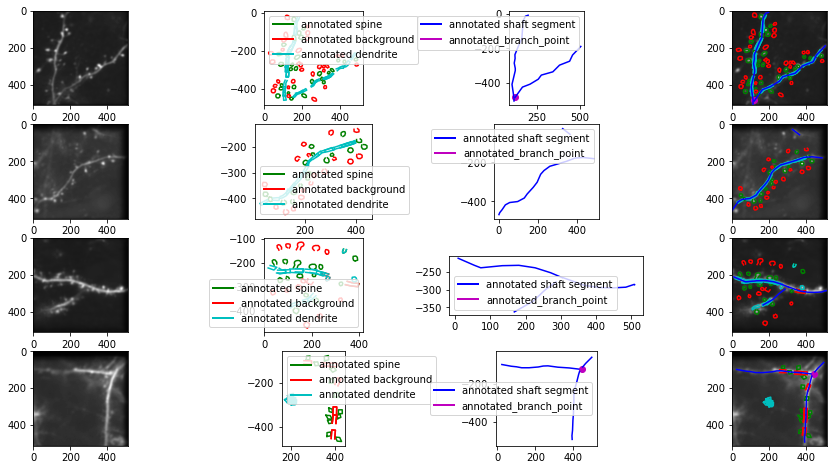

In [34]:


# First lets take a look at the 3 necessary files
#Load and plot all the files

path_list = [os.path.join('demo_data', dirname) for dirname in os.listdir('demo_data')]
dir_list = [fullpath for fullpath in path_list if os.path.isdir(fullpath)]

fig, axs = plt.subplots(len(dir_list), 4, figsize=(len(dir_list)*4, 4*2))

for i, current_data_dir in enumerate(dir_list):
    kyle_rois, projection_tif, shaft_roi = io.load_all(current_data_dir)
    spines, all_segments, spine_dmats, sanity_checks = main(
                                                            kyle_rois, 
                                                            projection_tif, 
                                                            shaft_roi)
    #plot the average projection tif
    io.projection_tif(projection_tif, axs[i,0])
    
    #plot the spine ROIs
    io.plot_kyle_rois(kyle_rois, ax=axs[i,1], legend=True, invert=True)
    
    #plot the dendrite ROIs
    io.plot_dendrite_rois(shaft_roi, ax=axs[i,2], legend=True, invert=True)
    
    #plot the overlay
    io.projection_tif(projection_tif, axs[i,3])
    io.plot_kyle_rois(kyle_rois, ax=axs[i,3])
    io.plot_dendrite_rois(shaft_roi, ax=axs[i,3])
    


[115. 501.]
[139.25       225.08333333]
[314.2 339.6]
[158.09091464  30.98484733]
[122.09091464  20.98484733]
[183.31818737 105.18182026]
[229.31818737 104.18182026]
[206.72222053  80.83333672]
[230.72222053  69.83333672]
[194.59999695 127.33333359]
[226.59999695 133.33333359]
[157.56060652 128.42424913]
[114.56060652 113.42424913]
[102.48333282 165.11667023]
[102.48333282 142.11667023]
[121.99999523 219.64583778]
[ 96.99999523 192.64583778]
[ 77.63636641 215.34848022]
[ 34.63636641 210.34848022]
[174.84848993 231.74243025]
[182.84848993 195.74243025]
[ 88.93333359 269.13333435]
[ 43.93333359 256.13333435]
[146.93938932 270.28787509]
[181.93938932 263.28787509]
[137.88332672 295.60000916]
[196.88332672 298.60000916]
[166.9833374  290.80000916]
[192.9833374  272.80000916]
[ 93.07407125 380.61109755]
[ 74.07407125 359.61109755]
[ 87.95833111 396.29167938]
[ 56.95833111 382.29167938]
[ 72.13333054 435.71666565]
[ 48.13333054 408.71666565]
[142.8888838  449.77778456]
[127.8888838  435.7777

921.0893925963817
0.0
[195.38888889 312.66666667]
[346.   41.5]
[118.34375 417.15625]
[127.34375 454.15625]
[152.89285714 413.64285714]
[155.89285714 441.64285714]
[156.40625 376.40625]
[186.40625 395.40625]
[183.58333333 350.04166667]
[194.58333333 369.04166667]
[212.64285714 323.46428571]
[224.64285714 342.46428571]
[216.95833333 302.        ]
[236.95833333 310.        ]
[202.11111111 259.47222222]
[171.11111111 244.47222222]
[232.05 227.75]
[216.05 230.75]
[285.65625 252.34375]
[277.65625 296.34375]
[379.38888889 212.16666667]
[379.38888889 256.16666667]
[349.96875 148.71875]
[302.96875 143.71875]
[413. 176.]
[403. 136.]
[432.28125 198.625  ]
[413.28125 235.625  ]
[227.34375 197.46875]
[197.34375 188.46875]
[306.58333333 230.20833333]
[316.15 245.85]
[ 47.40625 385.21875]
[ 44.40625 347.21875]
[ 66.03125 402.75   ]
[ 88.03125 432.75   ]


467.6419028863219
0.0
[156.75  237.375]
[421.375 285.625]
[232.5  318.75]
[ 42.4375 197.3125]
[ 62.4375 134.3125]
[ 87.05555556 193.66666667]
[ 99.05555556 127.66666667]
[ 66.5        272.38888889]
[ 36.5        324.38888889]
[ 97.25    266.65625]
[ 93.25    316.65625]
[149.875 254.375]
[144.875 301.375]
[137.55769231 203.48076923]
[150.55769231 126.48076923]
[203.19444444 215.52777778]
[217.19444444 136.52777778]
[209.75  250.625]
[190.875  281.4375]
[237.625   216.90625]
[263.625   153.90625]
[217.09375 358.65625]
[233.09375 423.65625]
[176.         334.72222222]
[164.         275.72222222]
[133.92857143 400.46428571]
[178.92857143 460.46428571]
[322.15625 287.25   ]
[320.15625 354.25   ]
[382.4375  182.59375]
[368.83333333 289.375     ]
[336.75       150.85714286]
[256.33333333 248.625     ]
[368.83333333 289.375     ]
[266.75       267.85714286]


340.3184414655816
0.0
[469.33333333  87.66666667]
[212.54545455 110.63636364]
[404.92857143 311.71428571]
[452.33334351 125.33333588] [428.33334351 120.        ] [440.33334351 122.66666794]
[452.33334351 125.33333588] [428.33334351 120.        ] [440.33334351 122.66666794]
[500.33332825  51.00000191]
[392.         502.00000763]
[15.33333302 97.        ]
[376. 137.] [404. 143.] [390. 140.]
[376. 137.] [404. 143.] [390. 140.]
[389.5 118.5]
[351. 100.] [368.  76.] [359.5  88. ]
[351. 100.] [368.  76.] [359.5  88. ]
[356.5 116.5]
[267.66665649  95.66666412] [285.          78.33333588] [276.33332825  87.        ]
[267.66665649  95.66666412] [285.          78.33333588] [276.33332825  87.        ]
[274.5 107.5]
[303.33334351 106.33333588] [324.66665649 120.33333588] [314.         113.33333588]
[303.33334351 106.33333588] [324.66665649 120.33333588] [314.         113.33333588]
[356.5 116.5]
[373. 200.] [392. 183.] [382.5 191.5]
[373. 200.] [392. 183.] [382.5 191.5]
[411.5 195. ]
[414. 340.] [4

498.03342662910825
0.0


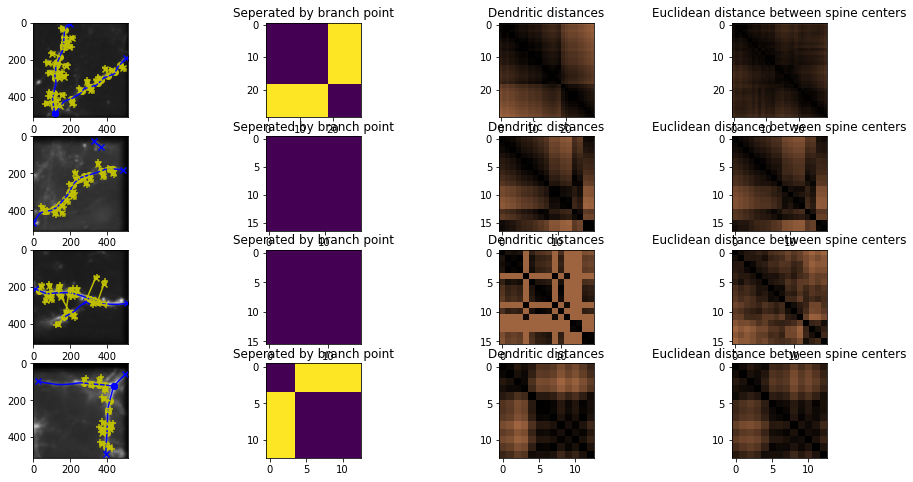

In [35]:

# Next lets look at the distance computations
#TODO Make sure the two dmats are on the same color scale

#TODO should also label the spines by number here - may have to do a scatter? willbe easier to look this up
fig, axs = plt.subplots(len(dir_list), 4, figsize=(len(dir_list)*4, 4*2))

for i, current_data_dir in enumerate(dir_list):
    kyle_rois, projection_tif, shaft_roi = io.load_all(current_data_dir)
    spines, all_segments, spine_dmats, sanity_checks = main(
                                                            kyle_rois, 
                                                            projection_tif, 
                                                            shaft_roi)
    #plot the cleaner overlay image
    ax = axs[i,0]
    io.projection_tif(projection_tif, ax)
    io.plot_dendrite(all_segments, ax)
    io.plot_spines(spines, ax)

    #plot weather the connection is through a branch point
    axs[i,1].imshow(spine_dmats['seperated_by_branch_point'])
    axs[i,1].set_title('Seperated by branch point')
    
    den_ds = spine_dmats['dendritic_distance']
    combined_data = np.array([den_ds,
                             spine_dmats['euclidian distance between Spine Centers']]
                             )
    combined_data= combined_data.astype(np.float64)
    #Get the min and max of all your data
    _min, _max = np.nanmin(combined_data), np.nanmax(combined_data)

    #plot the dendritic distances
    
    print(_max)
    print(_min)
    den_ds[np.isnan(den_ds)] = _max
    axs[i,2].imshow(den_ds, cmap=plt.cm.copper, vmin = _min, vmax = 2*_max)
    axs[i,2].set_title('Dendritic distances')
    

    
    #plot the euclidean distances
    axs[i,3].imshow(spine_dmats['euclidian distance between Spine Centers'], cmap=plt.cm.copper, vmin = _min, vmax = 2*_max)
    axs[i,3].set_title('Euclidean distance between spine centers')




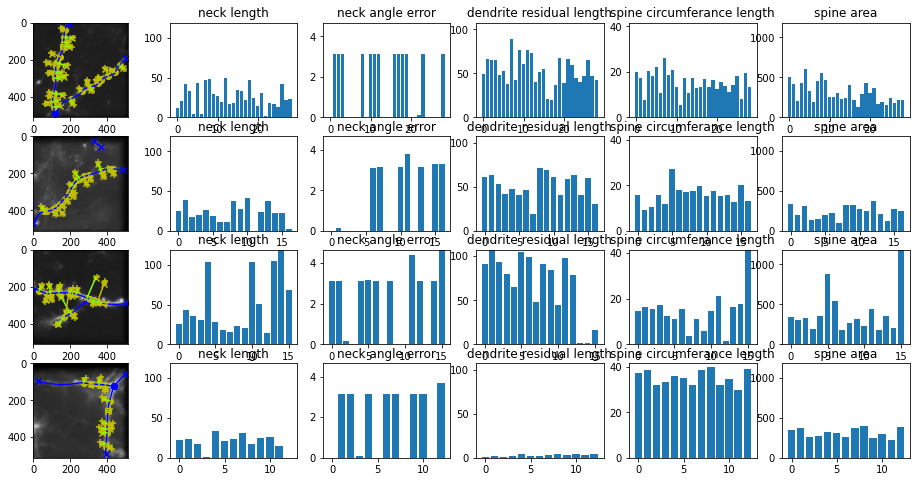

In [38]:
#Last lets look at the spine stats and how they can be used for QC
# label each of them with a number, and then use the number to plot the value as a bar
# neck angle, neck length, area, circumference and dend residual

fig, axs = plt.subplots(len(dir_list), len(sanity_checks.keys())+1, figsize=(len(dir_list)*4, 4*2))

maxes = [0]*len(sanity_checks)
for i, current_data_dir in enumerate(dir_list):
    kyle_rois, projection_tif, shaft_roi = io.load_all(current_data_dir)
    spines, all_segments, spine_dmats, sanity_checks = main(
                                                            kyle_rois, 
                                                            projection_tif, 
                                                            shaft_roi)
    #plot the cleaner overlay image
    ax = axs[i,0]
    io.projection_tif(projection_tif, ax)
    io.plot_dendrite(all_segments, ax)
    io.plot_spines(spines, ax)

    #plot each of the sanity checks
    for j, (key, values) in enumerate(sanity_checks.items()):
        ax = axs[i,j+1]
        ax.bar(list(range(len(values))), values)
        ax.set_title(key)
        maxes[j] = max((maxes[j], max(values)))

for i, current_data_dir in enumerate(dir_list):
    for j, check_max in enumerate(maxes):
        axs[i,j+1].set_ylim([0,check_max])



[('b', 5), ('a', 4), ('c', 2)]


In [ ]:
#Maybe add one more to demo the different types of euclidean measurements
#Also maybe add a zoom in on the erroneous one - number the spines so you can speak about them and the errors 

d = {'a':4, 'b':5, 'c':2}

def sort_by_value(pair):
    return pair[1]


print(sorted(d.items(), key=sort_by_value, reverse=True))